In [28]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_dummies = pd.get_dummies(df)

df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [4]:
del df_dummies['duration']
del df_dummies['y_no']
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


C:\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


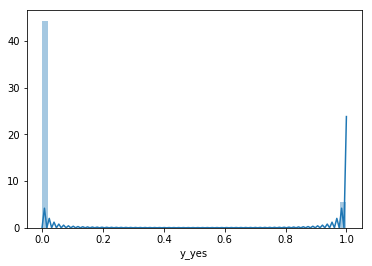

In [5]:
y_df = df_dummies['y_yes'].copy()
X_df = df_dummies.drop(['y_yes'], axis=1).copy()
sns.distplot(y_df)

In [6]:
clf = ExtraTreesClassifier(n_estimators = 100, max_depth = 4)

dummy_clf = DummyClassifier()
# Uses stratified k-fold by passing 'cv' parameter
scores = cross_val_score(clf, X_df, y_df, cv=10, scoring = make_scorer(acc))

dummy_clf.fit(X_df, y_df)

print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f"% (acc(y_df, dummy_clf.predict(X_df))))

ACC: 0.81 (+/- 0.15)
Dummy ACC: 0.80


In [9]:
clf = ExtraTreesClassifier(n_estimators = 20000, max_depth = 4, n_jobs=-1)
clf.fit(X_df, y_df)

print(acc(y_df, clf.predict(X_df)))

0.8990239875691949


[ 2 61  8  7  4 60  6 49  5 50 42 43 52  3 59 53 33 34  0 14 48 44 10 17
 47 51 46 45 55 27 31 23  1 22 57 16 56 32 58 20 28 54  9 25 18 21 15 39
 11 30 41 26 36 38 37 40 12 19 13 24 29 35]
Feature ranking:
1. pdays (0.178607)
2. poutcome_success (0.156058)
3. nr.employed (0.140453)
4. euribor3m (0.124024)
5. emp.var.rate (0.090260)
6. poutcome_nonexistent (0.038247)
7. cons.conf.idx (0.032417)
8. month_mar (0.026723)
9. cons.price.idx (0.026648)
10. month_may (0.022656)
11. contact_cellular (0.021361)
12. contact_telephone (0.021217)
13. month_oct (0.020361)
14. previous (0.015791)
15. poutcome_failure (0.013665)
16. month_sep (0.011707)
17. default_no (0.006511)
18. default_unknown (0.005927)
19. age (0.005448)
20. job_retired (0.005112)
21. month_jun (0.005054)
22. month_apr (0.004978)
23. job_blue-collar (0.004464)
24. job_student (0.004188)
25. month_jul (0.002882)
26. month_nov (0.002591)
27. month_dec (0.002578)
28. month_aug (0.001720)
29. day_of_week_mon (0.001709)
30. educati

(0, 0.4700900402060685)

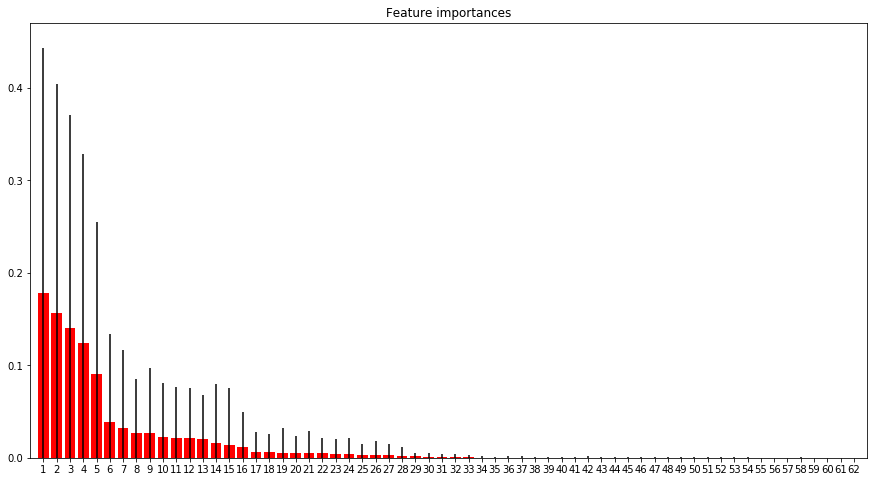

In [27]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X_df.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_df.columns[indices[f]],  importances[indices[f]]))

fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_df.shape[1]), range(1, X_df.shape[1]+1))
plt.xlim([-1, X_df.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


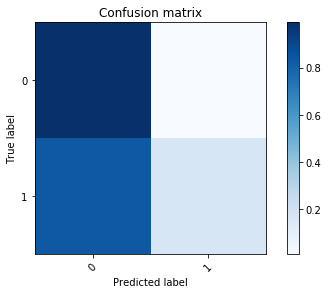

In [30]:
# Compute confusion matrix
y_pred = clf.predict(X_df)
cnf_matrix = confusion_matrix(y_df, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_df))), normalize = True,
                      title='Confusion matrix')

In [31]:
cnf_matrix

array([[36272,   276],
       [ 3883,   757]], dtype=int64)